In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model, \
preprocessing, model_selection, pipeline, metrics

import matplotlib.pyplot as plt

import seaborn as sns

pd.options.display.max_columns = 1000

from mlxtend.plotting import plot_confusion_matrix

%matplotlib inline

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,residence_history,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,4,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,2,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,3,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,4,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,4,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_balance        1000 non-null object
months_loan_duration    1000 non-null int64
credit_history          1000 non-null object
purpose                 1000 non-null object
amount                  1000 non-null int64
savings_balance         1000 non-null object
employment_length       1000 non-null object
installment_rate        1000 non-null int64
personal_status         1000 non-null object
other_debtors           1000 non-null object
residence_history       1000 non-null int64
property                1000 non-null object
age                     1000 non-null int64
installment_plan        1000 non-null object
housing                 1000 non-null object
existing_credits        1000 non-null int64
default                 1000 non-null int64
dependents              1000 non-null int64
telephone               1000 non-null object
foreign_worker          1000 non-null object
jo

In [4]:
df.default.value_counts()

1    700
2    300
Name: default, dtype: int64

In [7]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = pd.get_dummies(df.drop(columns=[target]), drop_first=True).values.astype(np.float32)

X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size = 0.3
                                    , random_state = 1)

pipe = pipeline.Pipeline([
    ("scaler", preprocessing.StandardScaler()),
    ("est", linear_model.LogisticRegression())
])

pipe.fit(X_train, y_train)
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

print("Accuracy: train: %f, test: %f" % (train_accuracy, test_accuracy))


Accuracy: train: 0.795714, test: 0.756667


(<matplotlib.figure.Figure at 0x1a19415a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a1940ec50>)

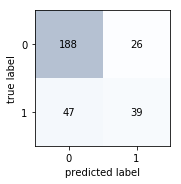

In [9]:
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

In [10]:
(188 + 39)/len(y_test)

0.7566666666666667

In [12]:
y_test_prob = pipe.predict_proba(X_test)
y_test_prob.shape

(300, 2)

In [15]:
y_test_pred = np.where(y_test_prob[:, 1]>0.5, 1, 0)

precision 0.6 recall 0.45348837209302323


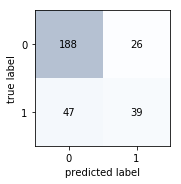

In [18]:
y_test_pred = np.where(y_test_prob[:, 1]>0.5, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred),
     "recall", metrics.recall_score(y_test, y_test_pred))

precision 0.75 recall 0.1744186046511628


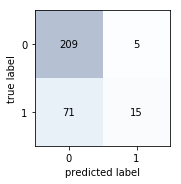

In [23]:
y_test_pred = np.where(y_test_prob[:, 1]>0.8, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred),
     "recall", metrics.recall_score(y_test, y_test_pred))

precision 0.43333333333333335 recall 0.7558139534883721


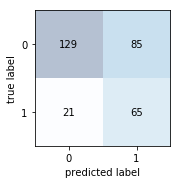

In [24]:
y_test_pred = np.where(y_test_prob[:, 1]>0.2, 1, 0)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))
print("precision", metrics.precision_score(y_test, y_test_pred),
     "recall", metrics.recall_score(y_test, y_test_pred))

Text(0,0.5,'TPR')

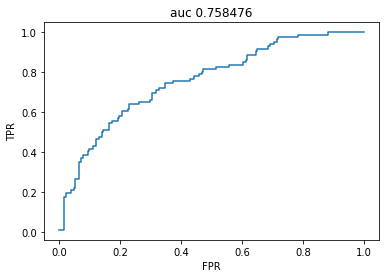

In [32]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_prob[:, 1])
plt.plot(fpr, tpr)
#plt.plot([0,0], [1,1], color = "red")
plt.title("ROC")
auc = metrics.auc(fpr, tpr)
plt.title("auc %f" % auc)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [33]:
pd.DataFrame({"fpr": fpr, "tpr": tpr, "threshold": thresholds})

,fpr,threshold,tpr
0,0.000000,0.961698,0.011628
1,0.014019,0.930588,0.011628
2,0.014019,0.822168,0.174419
3,0.023364,0.805632,0.174419
4,0.023364,0.764420,0.197674
5,0.037383,0.742418,0.197674
6,0.037383,0.728124,0.209302
7,0.046729,0.717631,0.209302
8,0.046729,0.707083,0.220930
9,0.051402,0.699555,0.220930


In [34]:
df = pd.read_csv("/data/creditcard-fraud.csv")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  